In [64]:
import numpy as np
import matplotlib.animation as anime
import matplotlib.pyplot as plt

In [2]:
marks = [(84,70), (76,64), (90,83), (63,45), (55,40), (60,38), (34,20)]

In [3]:
totx = 0;
toty = 0;
for i in marks:    
    print ("hours = %d; mark = %d" % (i[0], i[1]))
 
points = np.asarray(marks, dtype=float)
print(points)


#np.sum(diff ** 2)[:,0] )

hours = 84; mark = 70
hours = 76; mark = 64
hours = 90; mark = 83
hours = 63; mark = 45
hours = 55; mark = 40
hours = 60; mark = 38
hours = 34; mark = 20
[[ 84.  70.]
 [ 76.  64.]
 [ 90.  83.]
 [ 63.  45.]
 [ 55.  40.]
 [ 60.  38.]
 [ 34.  20.]]


In [4]:
# calculate Pearson's correlation coefficient R (unit-less)
def pearsonR(points):    
    # calculate x, y different from matrix "row" average
    diff = points - np.average(points, axis=0)
    # for numerator: sum "column" product of x, y difference
    num = np.sum(np.prod(diff, axis=1))
    # for denominator: calculate "row" product of sum of x, y difference. Square root result
    denom = np.prod(np.sum(diff ** 2, axis=0)) ** 0.5
    return num/denom

print("pearson correlating coefficient = %f" % pearsonR(points))


pearson correlating coefficient = 0.982041


In [275]:
# implement linear regression formula
def estimate_m(points):
    n = len(points)
    num = (n * np.sum(np.prod(points, axis=1))) - (np.prod(np.sum(points, axis=0))) 
    denom = (n * np.sum(points[:,0] **2)) - (np.sum(points[:,0]) **2)
    return num/denom

def estimate_b(points):
    n = len(points)
    num = (np.sum(points[:,1]) * np.sum(points[:,0]**2))  - (np.sum(points[:,0]) * np.sum(np.prod(points, axis=1)))
    denom = (n * np.sum(points[:,0]**2)) - (np.sum(points[:,0]) **2)
    return num/denom

def MinSquareError(actual, predicted):
    return np.sum((actual - predicted) ** 2)/len(actual)


def RSquared(actual, predicted):
    actual_mean = np.mean(actual)
    num = np.sum((actual - predicted) **2)
    denom = np.sum((actual - actual_mean) **2)
    return 1- (num/denom)


# my linear function approx: f(x) = estimate_m * x[new_observation] + estimate_y
def predictScore(points, hours):
    return estimate_m(points) * hours + estimate_b(points)

def predictHours(points, score):
    return (score - estimate_b(points)) / estimate_m(points)

print("Working 80 hours, predicted score is %f" % (predictScore(points, 80)))
print("To get a score of 85, predicted hours required are %f" % (predictHours(points, 85)))

print("Min Square Error: %f" % (MinSquareError(points[:,1], predictScore(points, points[:,0]))))
print("R squared: %f" %(RSquared(points[:,1], predictScore(points, points[:,0]))) )
#predictScore(points, points[,0])
#predictScore(points, np.arange(20, 100, 10))
#predictScore(points, np.array([80, 90]))


Working 80 hours, predicted score is 67.084279
To get a score of 85, predicted hours required are 96.021000
Min Square Error: 14.440527
R squared: 0.964404


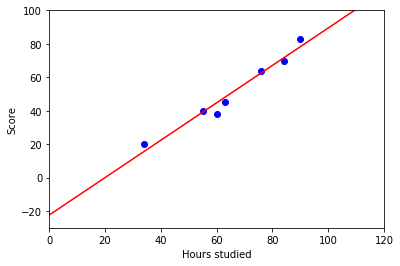

In [293]:
# plot the training points and line of best fit


x_hours = np.arange(-30, 130, 10)
plt.plot(points[:,0], points[:,1], 'bo', x_hours, predictScore(points, x_hours), 'r-' )
plt.axis([0, 120, -30, 100])
plt.xlabel('Hours studied')
plt.ylabel('Score')

plt.show()

# Gradient Descent Stuff

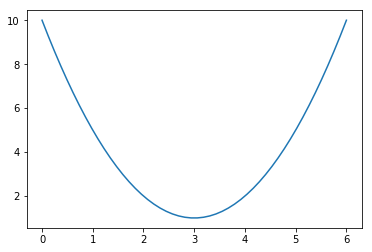

[ 1.4         1.72        1.976       2.1808      2.34464     2.475712
  2.5805696   2.66445568  2.73156454  2.78525164  2.82820131  2.86256105
  2.89004884  2.91203907  2.92963126  2.943705    2.954964    2.9639712
  2.97117696  2.97694157]


In [204]:
def costFunc2(x):
    return x**2 - (6 * x) + 10

x_vals = np.linspace(0, 6)
plt.plot(x_vals, costFunc2(x_vals), '-')
plt.show()
plt.gcf().clear()
plt.close()

def stepGradient(x_current, learning_rate):
    x_grad = (2 * x_current) - 6
    return x_current - (learning_rate * x_grad)

a = np.zeros((20,))
x_current = 1
for x in (range(0, 20)):
    x_current = stepGradient(x_current, 0.1)
    a[x] = x_current

print(a)

In [148]:
def costFunction(x):
    return (4 * x**4) - (3 * x**2) + (2 * x) - 1

costFunction(2)

55

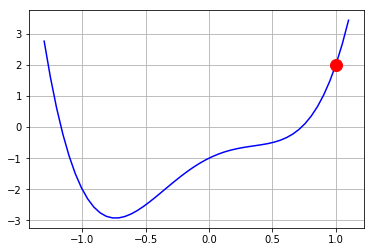

In [203]:
# plot cost function
#x_vals = np.arange(-1.3, 1.1, 0.01)
x_vals = np.linspace(-1.3, 1.1)

plt.plot(x_vals, costFunction(x_vals), 'b-')
plt.plot(1, costFunction(1), 'ro', markersize=12)
plt.grid()
plt.show()
plt.gcf().clear()
plt.clf()
plt.cla()
plt.close()

# Alternative way of plotting
#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
#ax.set_title('centered spines')
#ax.plot(x_vals, costFunction(x_vals))
#ax.spines['left'].set_position('center')
#ax.spines['right'].set_color('none')
#ax.spines['bottom'].set_position('center')
#ax.spines['top'].set_color('none')
#ax.spines['left'].set_smart_bounds(True)
#ax.spines['bottom'].set_smart_bounds(True)
#ax.xaxis.set_ticks_position('bottom')
#ax.yaxis.set_ticks_position('left')
#plt.show()



Iteration count = 7
[-1.2, -0.2776, -0.44376612, -0.60698385, -0.71017445, -0.73668688, -0.73784851, -0.73784322]
8


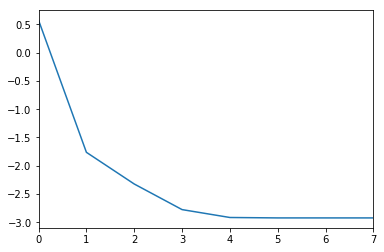

In [243]:
# learning rate
alpha = 0.05
max_iteration = 50
threshold = 0.00001
# we start off by selecting an arbitary value P on the x-axis and resolve the derivative of the cost function.
# objective is to find minimum of function 
# P = P - alpha(d/dP c())
def stepGradient(x_current, learningRate):    
    x_gradient = 16 * (x_current**3) - (6 * x_current) + 2    
    return x_current - (learningRate * x_gradient)    

# Batch gradient descent; stop when either result converges sufficiently or max iterations have been exceeded
def executeGD(start_x, alpha, max_iteration, threshold):
    # place first points in result list to show when plotting trajectory
    P = [start_x]    
    x_delta = start_x
    current_x = start_x
    iteration = 0
    while (abs(x_delta) > threshold and (iteration < max_iteration)):
        prev_x = current_x
        current_x = stepGradient(current_x, alpha)
        P.append(round(current_x, 8))
        x_delta = current_x - prev_x    
        iteration += 1
    return (iteration,P)

# execute and store in res(ult) tuple
res = executeGD(-1.2, alpha, max_iteration, threshold)
print("Iteration count = %d" % (res[0]))
print(res[1])
# plot cost over iteration
y_cost = [costFunction(x) for x in res[1]]
print(len(y_cost))
# display convergence toward function minimum
plt.plot(range(0, len(res[1])), y_cost, '-')
plt.xlim(0, len(res[1])-1)
# clear plot
plt.show()
plt.gcf().clear()
plt.close()


In [244]:
# animate iterations
fig = plt.figure()
ax = plt.axes(xlim=(-1.5, 1.2), ylim=(-4, 4))
line, = ax.plot([], [], 'ro', markersize=12)

def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    line.set_data(res[1][i], y_cost[i])    
    return line,

x_vals = np.linspace(-1.3, 1.1)
ax.plot(x_vals, costFunction(x_vals), 'b-')

#frames is the length of res_x
anim = anime.FuncAnimation(fig, animate, init_func=init,
                               frames=len(res[1]), interval=200, blit=True)
HTML(anim.to_jshtml())

In [289]:
# Car price predictor based on mileage

# first, however let's use the python lib sklearn to fit a linear regression model for the hours studied vs score dataset
from sklearn import linear_model
lm = linear_model.LinearRegression()
print(points)
X = points[:,0]
# reshape to respect linear model's fit function expected input vector
X = np.reshape(X, (-1,1))
y = points[:,1]
# fit linear regression linear model based on our data
model = lm.fit(X,y)
# predict scores given our input vector
print(lm.predict(X))
# predict score given "new" hours observation
print("Estimated score given 80 hours of study: %f" % (lm.predict(80)))
# get R2 score - % of explained variance from prediction
print("R2 score: %f" % (lm.score(X,y)))
# get coefficients
print(lm.coef_)
# get intercept
print(lm.intercept_)

[[ 84.  70.]
 [ 76.  64.]
 [ 90.  83.]
 [ 63.  45.]
 [ 55.  40.]
 [ 60.  38.]
 [ 34.  20.]]
[ 71.55733855  62.61121983  78.26692759  48.07377691  39.12765819
  44.71898239  15.64409654]
Estimated score given 80 hours of study: 67.084279
R2 score: 0.964404
[ 1.11826484]
-22.3769080235


R2 score: 0.538313


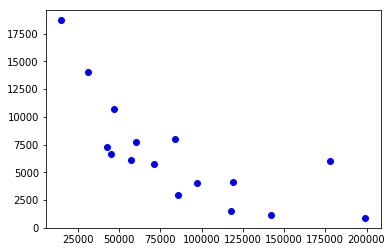

,mileage,price
0,14822,18700
1,31286,14000
2,42533,7300
3,45312,6700
4,46863,10700
5,57000,6100
6,60000,7700
7,71010,5800
8,84000,8000
9,85697,3000


In [310]:
import pandas as pd
df = pd.read_csv('car.csv', header=None, sep="\t", names=['mileage','price'])
df[["mileage"]]
df["price"]

# fit car price linear model
car_price = lm.fit(df[["mileage"]], df["price"])
print("R2 score: %f" % (car_price.score(df[["mileage"]], df[["price"]])))

plt.plot(df["mileage"], df["price"], "bo")
plt.show()
plt.close()


R2 score: 0.718252
[ 13423.58802715  11605.62226712  10363.72109468  10056.86207821
   9885.59963326   8766.26539435   8435.00341183   7219.27193601
   5784.90755173   5597.52369029   4349.43896085   2030.60508326
   1931.77859181   -650.18772056]


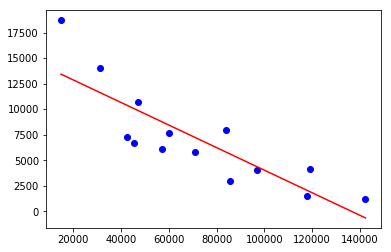

In [326]:
# remove visual outliers
df = df[~df.mileage.isin([178000,199312])]

car_price = lm.fit(df[["mileage"]], df["price"])
print("R2 score: %f" % (car_price.score(df[["mileage"]], df[["price"]])))
print(car_price.predict(df[["mileage"]]))

plt.plot(df["mileage"], df["price"], "bo")
plt.plot(df["mileage"], car_price.predict(df[["mileage"]]), "r-")
plt.show()
plt.close()



